In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek 
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.utils import class_weight



Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving df_clean.csv to df_clean.csv


In [0]:
import io
df_clean = pd.read_csv(io.BytesIO(uploaded['df_clean.csv']))
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)
# df_clean = df_clean[df_clean['Descripcio_victimitzacio']!='Mort']
df_clean
    

,Codi_expedient,Descripcio_tipus_persona,Descripcio_tipus_de_vehicle,Descripcio_victimitzacio,Edat,Codi_barri,Codi_carrer,Hora_de_dia,Mes_de_any,Dia_de_mes,Longitud,Latitud,Num_Greus,Num_Lleus,Num_Morts,...,Nombre_vehicles_parc,Any,Sortida_Sol,Posta_Sol,Dif_PostaoSortida_Sol,Num_Semaf_Barri,Dist_semaf,T,HR,PPT,VV10ESC,RVX10,Conductor,Passatger,Vianant
0,2017S000001,Conductor,Turisme,Ferit lleu,50,26,187105,4,1,1,2.148160,41.399482,0,1,0,...,26740,2017,8,17,4,3620,0.11435,9.1,70,0.0,2.4,5.5,1,0,0
1,2017S000004,Conductor,Motocicleta,Ferit lleu,27,6,89004,7,1,1,2.180756,41.402529,0,1,0,...,6904,2017,8,17,1,3058,0.01777,8.0,71,0.0,2.6,4.7,1,0,0
2,2017S006713,Passatger,Taxi,Ferit lleu,34,6,89004,3,8,3,2.180756,41.402529,0,1,0,...,0,2017,6,21,3,3058,0.01777,27.3,74,0.0,0.9,2.9,0,1,0
3,2017S000005,Passatger,Ciclomotor,Ferit lleu,40,66,243206,7,1,1,2.191008,41.396801,0,1,0,...,504,2017,8,17,1,3594,0.03419,8.0,71,0.0,2.6,4.7,0,1,0
4,2017S000005,Conductor,Ciclomotor,Ferit lleu,37,66,243206,7,1,1,2.191008,41.396801,0,1,0,...,504,2017,8,17,1,3594,0.03419,8.0,71,0.0,2.6,4.7,1,0,0
5,2017S000009,Conductor,Ciclomotor,Ferit lleu,35,18,270209,14,1,1,2.139199,41.380500,0,1,0,...,1432,2017,8,17,3,1462,0.10208,13.0,55,0.0,1.9,4.1,1,0,0
6,2017S000014,Conductor,Motocicleta,Ferit lleu,50,18,270209,16,1,1,2.139199,41.380500,0,1,0,...,5241,2017,8,17,1,1462,0.10208,11.8,61,0.0,1.9,3.9,1,0,0
7,2017S002395,Passatger,Taxi,Ferit lleu,24,18,270209,22,3,24,2.139199,41.380500,0,1,0,...,0,2017,6,19,3,1462,0.10208,6.9,98,3.5,4.9,10.2,0,1,0
8,2017S002395,Conductor,Taxi,Ferit lleu,47,18,270209,22,3,24,2.139199,41.380500,0,1,0,...,0,2017,6,19,3,1462,0.10208,6.9,98,3.5,4.9,10.2,1,0,0
9,2017S000011,Conductor,Bicicleta,Ferit lleu,29,67,700662,15,1,1,2.199915,41.391332,0,1,0,...,0,2017,8,17,2,1725,0.03664,12.9,56,0.0,1.7,3.9,1,0,0


In [0]:
# Labels are the values we want to predict
Y = df_clean['Descripcio_victimitzacio'] 
Y = Y.replace({'Mort': 2}, regex=True)
Y = Y.replace({'Ferit lleu': 0}, regex=True)
Y = Y.replace({'Ferit greu': 1}, regex=True)


# hot_encoders = ['Num_Greus', 'Num_Lleus', 'Num_Morts']

# Y = df_clean[hot_encoders]

# Remove the labels from the features
# axis 1 refers to the columns
X = df_clean.drop(columns = ['Num_Greus', 'Num_Lleus', 'Num_Morts', 
                                      'Codi_expedient','Descripcio_victimitzacio',
                                     'Descripcio_tipus_persona','Descripcio_tipus_de_vehicle',
                                     'Longitud','Latitud'], axis = 1)
# Saving feature names for later use
feature_list = list(X.columns)


num_columns = len(X.columns)
pd.set_option("display.max_columns", num_columns)
X

,Edat,Codi_barri,Codi_carrer,Hora_de_dia,Mes_de_any,Dia_de_mes,Autobus,Bicicleta,Ciclomotor,Furgoneta,Motocicleta,Taxi,Turisme,Num_Victimes,Num_Vehicles_Implicats,Poblacio,Nombre_vehicles_parc,Any,Sortida_Sol,Posta_Sol,Dif_PostaoSortida_Sol,Num_Semaf_Barri,Dist_semaf,T,HR,PPT,VV10ESC,RVX10,Conductor,Passatger,Vianant
0,50,26,187105,4,1,1,0,0,0,0,0,0,1,1,1,47753,26740,2017,8,17,4,3620,0.11435,9.1,70,0.0,2.4,5.5,1,0,0
1,27,6,89004,7,1,1,0,0,0,0,1,0,0,1,2,51651,6904,2017,8,17,1,3058,0.01777,8.0,71,0.0,2.6,4.7,1,0,0
2,34,6,89004,3,8,3,0,0,0,0,0,1,0,1,2,51651,0,2017,6,21,3,3058,0.01777,27.3,74,0.0,0.9,2.9,0,1,0
3,40,66,243206,7,1,1,0,0,1,0,0,0,0,2,3,15204,504,2017,8,17,1,3594,0.03419,8.0,71,0.0,2.6,4.7,0,1,0
4,37,66,243206,7,1,1,0,0,1,0,0,0,0,2,3,15204,504,2017,8,17,1,3594,0.03419,8.0,71,0.0,2.6,4.7,1,0,0
5,35,18,270209,14,1,1,0,0,1,0,0,0,0,1,2,41244,1432,2017,8,17,3,1462,0.10208,13.0,55,0.0,1.9,4.1,1,0,0
6,50,18,270209,16,1,1,0,0,0,0,1,0,0,1,2,41244,5241,2017,8,17,1,1462,0.10208,11.8,61,0.0,1.9,3.9,1,0,0
7,24,18,270209,22,3,24,0,0,0,0,0,1,0,2,2,41244,0,2017,6,19,3,1462,0.10208,6.9,98,3.5,4.9,10.2,0,1,0
8,47,18,270209,22,3,24,0,0,0,0,0,1,0,2,2,41244,0,2017,6,19,3,1462,0.10208,6.9,98,3.5,4.9,10.2,1,0,0
9,29,67,700662,15,1,1,0,1,0,0,0,0,0,1,2,9404,0,2017,8,17,2,1725,0.03664,12.9,56,0.0,1.7,3.9,1,0,0


In [0]:
class_weight = {0: 1.,
                1: 500.,
                2: 1000.}

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                Y, 
                                                train_size=0.66, 
                                                random_state = 0
                                               )
# Feature Scaling
sc = StandardScaler()  
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)  
Xtest = sc.transform(Xtest)  
print('Resampled dataset shape {}'.format(Counter(ytrain)))

Resampled dataset shape Counter({0: 5285, 1: 109, 2: 4})


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE
# smt = SMOTETomek(ratio = 'auto', random_state=42)
# Xtrain1, ytrain1 = smt.fit_resample(Xtrain1, ytrain1)

# # from imblearn.over_sampling import SMOTE
# # smote = SMOTE('minority')
# # Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

# print('Resampled dataset shape {}'.format(Counter(ytrain)))

In [0]:
Counter(ytrain)

Counter({0: 5285, 1: 109, 2: 4})

In [0]:
# get shapes
N, D = Xtrain.shape
K = len(set(ytrain))


In [0]:
# the model will be a sequence of layers
model = Sequential()

# ANN with layers [11218] -> [1500] -> [500] -> [300] -> [31]
model.add(Dense(units=1500, input_dim=D))
model.add(Activation('relu'))
model.add(Dense(units=750)) 
model.add(Activation('relu'))
model.add(Dense(units=500)) 
model.add(Activation('relu'))
model.add(Dense(units=300)) 
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1500)              48000     
_________________________________________________________________
activation_13 (Activation)   (None, 1500)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 750)               1125750   
_________________________________________________________________
activation_14 (Activation)   (None, 750)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 500)               375500    
_________________________________________________________________
activation_15 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               150300    
__________

In [0]:
fited_model = model.fit(Xtrain, ytrain, validation_data=(Xtrain, ytrain), epochs=25, batch_size=50)

Train on 5398 samples, validate on 5398 samples
Epoch 1/25
5398/5398 [==============================] - 6s 1ms/step - loss: 0.1203 - acc: 0.9772 - val_loss: 0.0946 - val_acc: 0.9791
Epoch 2/25
5398/5398 [==============================] - 5s 958us/step - loss: 0.0955 - acc: 0.9791 - val_loss: 0.0810 - val_acc: 0.9791
Epoch 3/25
5398/5398 [==============================] - 5s 951us/step - loss: 0.0899 - acc: 0.9791 - val_loss: 0.0776 - val_acc: 0.9791
Epoch 4/25
5398/5398 [==============================] - 5s 959us/step - loss: 0.0808 - acc: 0.9793 - val_loss: 0.0725 - val_acc: 0.9798
Epoch 5/25
5398/5398 [==============================] - 5s 956us/step - loss: 0.0786 - acc: 0.9794 - val_loss: 0.0611 - val_acc: 0.9791
Epoch 6/25
5398/5398 [==============================] - 5s 959us/step - loss: 0.0708 - acc: 0.9804 - val_loss: 0.0651 - val_acc: 0.9813
Epoch 7/25
5398/5398 [==============================] - 5s 960us/step - loss: 0.0654 - acc: 0.9809 - val_loss: 0.0512 - val_acc: 0.9841
Ep

In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model.predict(Xtest).round()))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2725
           1       0.07      0.04      0.05        53
           2       0.00      0.00      0.00         4

   micro avg       0.97      0.97      0.97      2782
   macro avg       0.35      0.34      0.34      2782
weighted avg       0.96      0.97      0.97      2782



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
y_pred = model.predict(Xtest)
confusion_matrix(ytest, y_pred.round())

array([[2699,   26,    0],
       [  51,    2,    0],
       [   4,    0,    0]])

In [0]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    fig = plt.figure(figsize=(10,7))
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title, size=18)
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()

<Figure size 576x396 with 0 Axes>

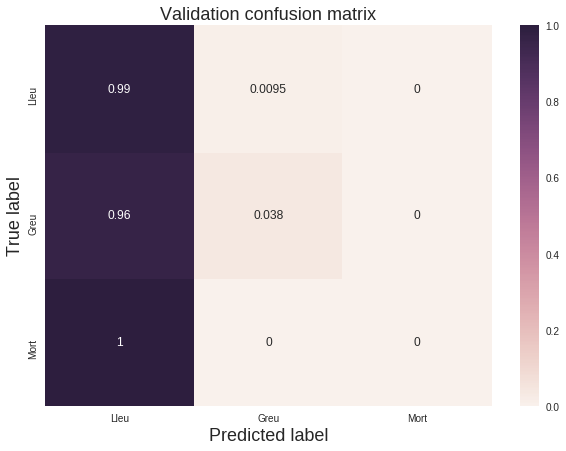

In [0]:
cm = confusion_matrix(ytest,model.predict(Xtest).round())
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=['Lleu','Greu','Mort'], title='Validation confusion matrix')

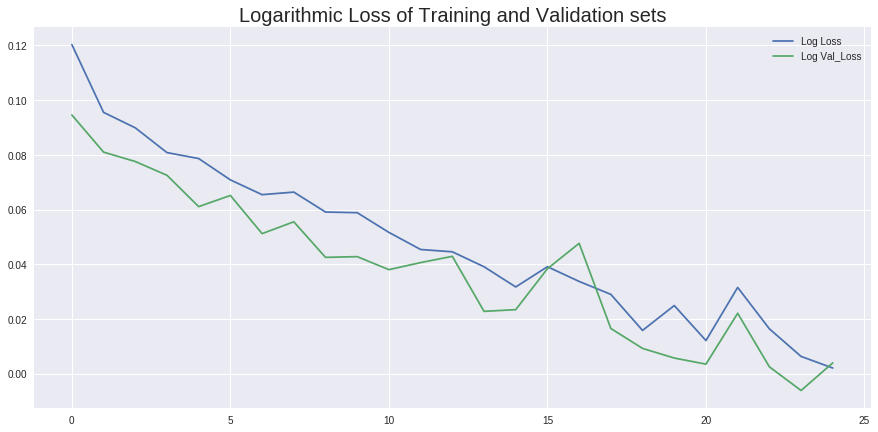

In [0]:
# plot some data
fig = plt.figure(figsize=(15,7))

plt.plot(fited_model.history['loss'], label='Log Loss')
plt.plot(fited_model.history['val_loss'], label='Log Val_Loss')
plt.title('Logarithmic Loss of Training and Validation sets', fontsize=20)

plt.legend()
plt.show()

